# Ayudantía 5 Programación Como Herramienta Para Ingeniería (IIC2115)

diego.herrerag00@uc.cl


## ¿Qué es el Machine Learning?
El Machine Learning (ML) son tareas computacionales que construyen modelos predictivos basados en datos para resolver tareas específicas. Se caracteriza por:
- Aprender de la experiencia (más datos, mejor desempeño)
- Enfocarse en predicción y generalización
- Uso transversal en clasificación, regresión, clustering, recomendación, etc.


## Tipos de aprendizaje
- `Supervisado`: Aprendizaje donde se busca obtener un valor objetivo, o `Targets`. Las tareas involucradas son: clasificación y regresión.
- `No supervisado`: No se busca obtener un valor objetivo o `Targets`. Sus tareas son: clustering y reducción de dimensionalidad.
- (Mención) Reforzado: agente que maximiza recompensa al interactuar con un entorno.


## Entrenamiento, evaluación y generalización: Esquema de procesamiento.
- Separar datos en entrenamiento y prueba (y validación si se ajustan hiperparámetros).
- Entrenar minimizando una función de pérdida.
- Evaluar en datos no vistos para estimar capacidad de generalización.
- Overfitting: modelo demasiado complejo que memoriza el entrenamiento.
- Underfitting: modelo demasiado simple que no captura el patrón.
- Mitigar con regularización, validación cruzada, control de complejidad y más datos.


## Uso de scikit-learn y representación de datos
`Scikit-learn` es una librería para machine Learning más conocido y utilizado en Python, donde permite la integración con pandas.  Usa un esquema uniforme:
- `Matríz de características (X)`: Es la forma en que están representados los datos entregados para el entrenamiento, donde cada uno (`x_i`) se puede asociar a un vector de dicha matriz. Si la tarea a resolver es supervisada, se tendrá un vector objetivo (`y`) nombrado como `Target`. Esta matriz tendrá un tamaño de `n_muestras × n_features`, asociandolo a pandas, sería un `DataFrame`, o bien, `n_datos x n_caracetristicas` del cual este compuesto cada uno, asociandolo a un DataFrame, cada fila será un dato o muestra y cada caracetristica será el valor asociado a una columna o una feature de cada dato.
- `y`: Target o vector objetivo, de tamaño `n_muestras`. Asociandolo a pandas, sería una `Serie`.
- Métodos de entrenamiento:

    -`fit(X, y)`: Entrena el modelo con los datos de entrada de la matríz `X` y las targets `y`. Es el paso de `aprendizaje`. Notar que se le entregan targets ya conocidos, lo cual se contradecería con la idea de buscar predecirlos, esto se debe a que la idea de este método es el entrenamiento, por lo cual, busca aprender la relación de los datos de `X`con los targets `y`, conocidos, para que así, cuando se le entregue otros datos `X` sepa predecir con buen rendimiento los valores desconocidos de `y`.

    -`predict(X)`: Usa el modelo ya entrenado para predecir nuevos valores de un target `y` sobre nuevos datos de `X`. Es el paso de inferencia, usar lo aprendido para predecir.
    
    -`transform(X)`: Método que aplica una transformación a los datos `X`, por ejemplo, escalar, normalizar, reducir dimensiones, entre otros, para cambiar la representación de los datos. Notar que no busca predecir.

    -`fit_transform(X)`: Combina los pasos anteriores: Primero entrena, ajustando los parámetros de la transformación con `X`, y luego aplica la transformación a `X`. Se usa mucho en preprocesamiento. En otras palabras, lo que busca es aprender de los datos y a cómo transformar, y luego,transformar eficientemente. 


## Uso de scikit-learnes 
`scikit-learn` es la librería más conocida y usada python para ML. En la representación de datos tiene un esquema uniforme: 
- `X`: matriz de características de tamaño `n_muestras × n_features` (p. ej. `DataFrame`).
- `y`: vector objetivo de tamaño `n_muestras` (p. ej. `Series`).
- API consistente a los metodos: `fit(X, y)`, `predict(X)`, `transform(X)`, `fit_transform(X)`.
- Integración con `pandas` y `pipelines` para preprocesamiento y modelamiento.


## Preparación de datos y carga del dataset Iris
Usaremos el archivo del curso `iris.csv` para el ejemplo:
- Convertimos la etiqueta `species` a valores numéricos con `LabelEncoder`.
- Separamos en entrenamiento/prueba con `train_test_split` estratificado para mantener la proporción por clase.
- Estandarizamos `X` con `StandardScaler`: ajustamos solo en entrenamiento (`fit`) y aplicamos en prueba (`transform`) para evitar data leakage.


In [ ]:
# Carga y preprocesamiento del dataset Iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Cargar datos (asegúrate de ejecutar este notebook dentro de la carpeta Notebooks)
iris = pd.read_csv('iris.csv')

# Codificar etiqueta
label_encoder = LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species'])

# Separar caracteristicas y target
caracteristicas = ['sepal_length','sepal_width','petal_length','petal_width']
X = iris[caracteristicas].copy()
y = iris['species'].copy()

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalado (fit en train, transform en test), para que todas las variables numericas queden a una misma escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Modelos supervisados: clasificación
En el ejemplo comparamos tres enfoques:
- `Árbol de Decisión`: reglas if-then aprendidas por particiones del espacio de features.
- `SVM (RBF)`: separa clases maximizando el margen, con kernel no lineal.
- `KNN (k=5)`: predice por mayoría entre los k vecinos más cercanos.
Usamos `accuracy` y mostramos la matriz de confusión del mejor modelo para interpretar errores.


DecisionTree: accuracy = 0.911
SVM_RBF: accuracy = 0.933
KNN_k5: accuracy = 0.911


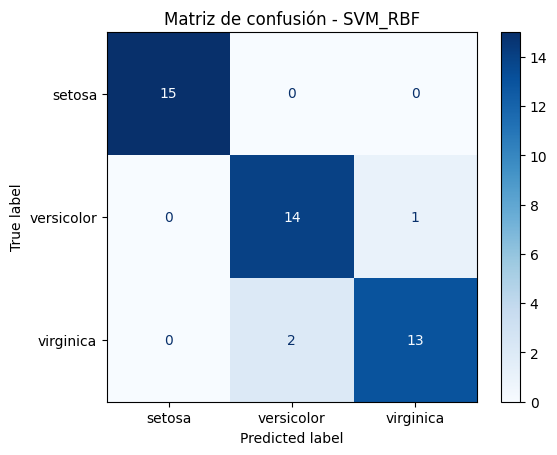

In [ ]:
# Clasificación: Árbol, SVM y KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVM_RBF': SVC(kernel='rbf', probability=False, random_state=42),
    'KNN_k5': KNeighborsClassifier(n_neighbors=5)
}

results = {}
for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: accuracy = {acc:.3f}")

# Matriz de confusión para el mejor modelo
nombre_mejor_modelo = max(results, key=results.get)
mejor_modelo = models[nombre_mejor_modelo]
mejor_y_pred = mejor_modelo.predict(X_test_scaled)
cm = confusion_matrix(y_test, mejor_y_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=label_encoder.inverse_transform([0,1,2]))
disp.plot(cmap='Blues')
plt.title(f'Matriz de confusión - {nombre_mejor_modelo}')
plt.show()


## Modelos supervisados: regresión lineal y polinómica
En el ejemplo generamos datos sintéticos 1D y ajustamos:
- `Regresión lineal` (grado 1): puede subajustar (underfitting) funciones no lineales.
- `Regresión polinómica` (grados mayores): aumenta flexibilidad; grados muy altos pueden sobreajustar.
Comparamos curvas y error (MSE) para visualizar el sesgo-varianza.


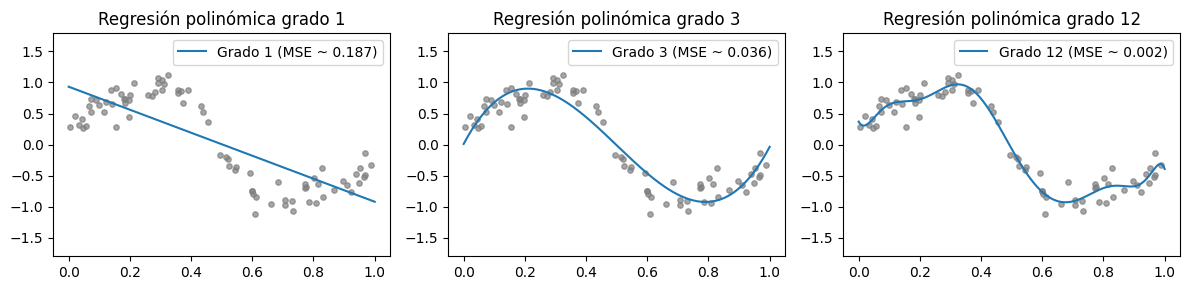

In [ ]:
# Regresión lineal vs polinómica
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Datos sintéticos
def f(x):
    return np.sin(2*np.pi*x) + 0.2*np.cos(5*np.pi*x)

rng = np.random.RandomState(42) # Este metodo sirve para crear un generador de números aleatorios con una semilla fija, en este caso, 42.
X = np.sort(rng.rand(80, 1), axis=0)
y = f(X).ravel() + rng.normal(scale=0.15, size=80)
X_test_reg = np.linspace(0, 1, 400).reshape(-1, 1)

def fit_plot(degree, ax):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X_test_reg)
    mse = mean_squared_error(f(X_test_reg).ravel(), y_pred)
    ax.scatter(X, y, s=15, color='gray', alpha=0.7)
    ax.plot(X_test_reg, y_pred, label=f'Grado {degree} (MSE ~ {mse:.3f})')
    ax.legend()
    ax.set_ylim(-1.8, 1.8)

fig, axes = plt.subplots(1,3, figsize=(12,3))
for d, ax in zip([1,3,12], axes):
    fit_plot(d, ax)
    ax.set_title(f'Regresión polinómica grado {d}')
plt.tight_layout()
plt.show()


## Modelos no supervisados
En el ejemplo:
- Aplicamos `PCA` a 2D para visualizar la estructura de Iris en un plano.
- Ejecutamos `K-Means (K=3)` sobre los datos y comparamos con etiquetas reales (solo como referencia visual).


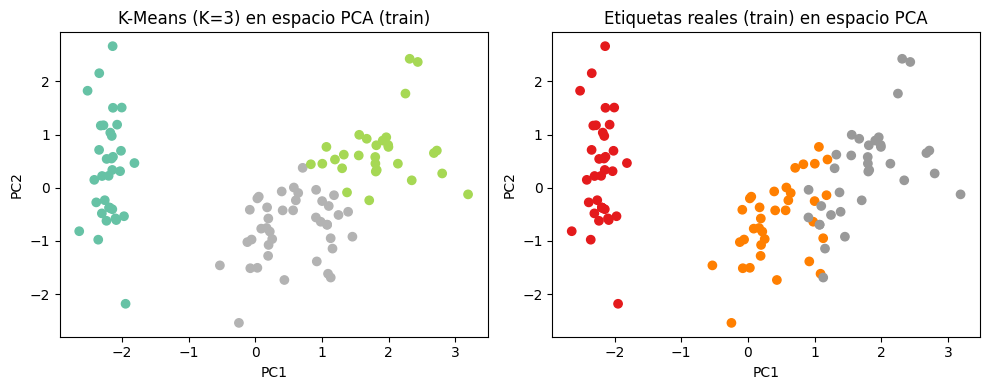

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA a 2D para visualizar
pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# K-Means con K=3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=clusters, cmap='Set2')
plt.title('K-Means (K=3) en espacio PCA (train)')
plt.xlabel('PC1'); plt.ylabel('PC2')

plt.subplot(1,2,2)
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_train, cmap='Set1')
plt.title('Etiquetas reales (train) en espacio PCA')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.tight_layout()
plt.show()


## Buenas prácticas para lograr una tarea de ML óptima
- Separar claramente entrenamiento/validación/test (o validación cruzada).
- Ajustar hiperparámetros con validación, no con test.
- Estandarizar/normalizar solo con estadísticas del entrenamiento.
- Medir métricas adecuadas (precision/recall/F1 en clases desbalanceadas, RMSE en regresión).


## Modelos supervisados: Árboles y Ensambles
Compararemos dos familias basadas en árboles:
- `Árbol de Decisión`: un único árbol, alta interpretabilidad, riesgo de sobreajuste.
- `RandomForest`: ensamble de muchos árboles entrenados en paralelo (bagging) que reduce varianza.
Medimos `accuracy` en test para ver la diferencia práctica.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf_tree = DecisionTreeClassifier(random_state=42)
clf_rf = RandomForestClassifier(n_estimators=200, random_state=42)

for name, clf in [('DecisionTree', clf_tree), ('RandomForest', clf_rf)]:
    clf.fit(X_train_scaled, y_train)
    pred = clf.predict(X_test_scaled)
    print(f"{name}: accuracy = {accuracy_score(y_test, pred):.3f}")


DecisionTree: accuracy = 0.911
RandomForest: accuracy = 0.889


## PCA vs t-SNE (visualización)
En el ejemplo reducimos Iris a 2D con dos técnicas:
- `PCA` (lineal): maximiza varianza global; rápido y estable.
- `t-SNE` (no lineal): preserva vecindad local; revela clústers visuales.
Comparamos colorando por etiqueta real (solo referencia) para apreciar separación.


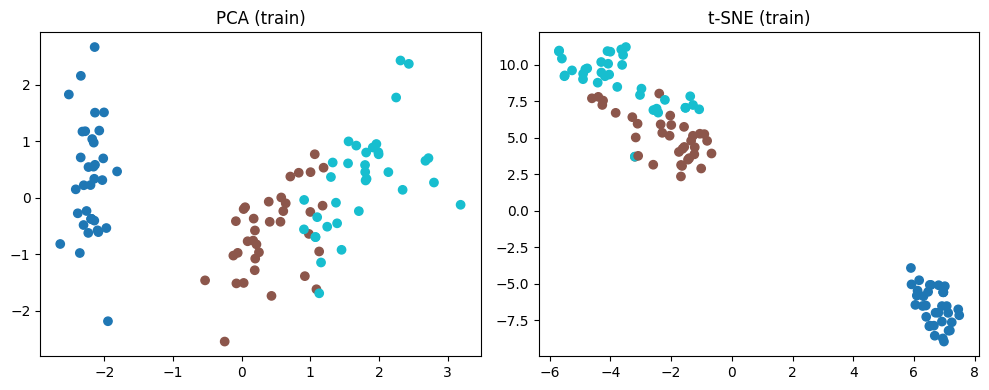

In [6]:
# PCA vs t-SNE en Iris (entrenamiento)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reducir a 2D con PCA y con t-SNE sobre train escalado
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2, random_state=42)
X2_pca = pca2.fit_transform(X_train_scaled)

tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto', perplexity=30)
X2_tsne = tsne.fit_transform(X_train_scaled)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=y_train, cmap='tab10')
plt.title('PCA (train)')
plt.subplot(1,2,2)
plt.scatter(X2_tsne[:,0], X2_tsne[:,1], c=y_train, cmap='tab10')
plt.title('t-SNE (train)')
plt.tight_layout()
plt.show()


## K-Means: método del codo e índice silhouette
En el ejemplo calculamos:
- `Silhouette` medio para cuantificar qué tan separados/compactos quedan los clústers.
Esto guía la elección de K sin usar etiquetas.


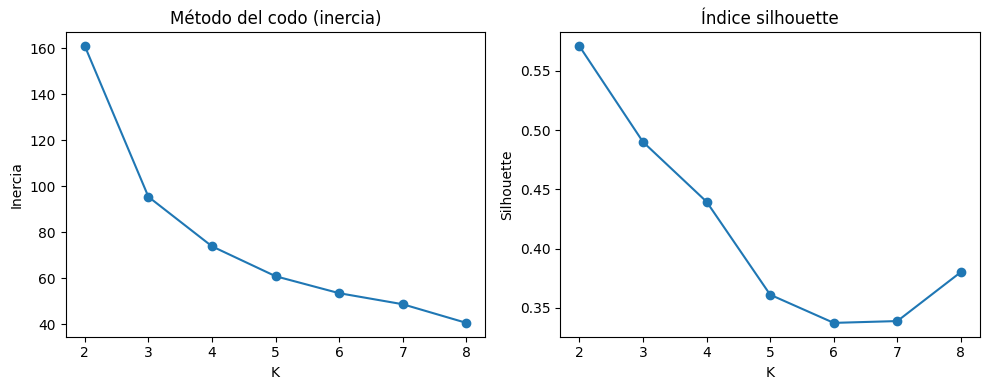

In [7]:
# Elbow y silhouette para K-Means (train)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

K_range = range(2, 9)
inertias = []
silhs = []
for K in K_range:
    kmeans = KMeans(n_clusters=K, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_train_scaled)
    inertias.append(kmeans.inertia_)
    silhs.append(silhouette_score(X_train_scaled, labels))

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(list(K_range), inertias, marker='o')
ax[0].set_title('Método del codo (inercia)')
ax[0].set_xlabel('K'); ax[0].set_ylabel('Inercia')
ax[1].plot(list(K_range), silhs, marker='o')
ax[1].set_title('Índice silhouette')
ax[1].set_xlabel('K'); ax[1].set_ylabel('Silhouette')
plt.tight_layout()
plt.show()


## Regresión logística y balanced accuracy
En el ejemplo entrenamos `LogisticRegression` para clasificación multiclase. Reportamos:
- `Accuracy` global.
- `Balanced accuracy`: promedio del recall por clase, útil si las clases están desbalanceadas.


In [8]:
# Regresión logística con balanced accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score

logreg = LogisticRegression(max_iter=1000, multi_class='auto')
logreg.fit(X_train_scaled, y_train)
preds = logreg.predict(X_test_scaled)
print("Accuracy:", f"{accuracy_score(y_test, preds):.3f}")
print("Balanced accuracy:", f"{balanced_accuracy_score(y_test, preds):.3f}")


Accuracy: 0.911
Balanced accuracy: 0.911


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Gradient Boosting vs RandomForest
En el ejemplo comparamos dos ensambles de árboles:
- `RandomForest` (bagging): promedia muchos árboles independientes para bajar varianza.
- `GradientBoosting` (boosting): agrega árboles secuencialmente para corregir el error acumulado.
Contrastamos `accuracy` para ilustrar diferencias de desempeño.


In [9]:
# Comparación GradientBoosting vs RandomForest
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)

for name, clf in [('GradientBoosting', gb), ('RandomForest', rf)]:
    clf.fit(X_train_scaled, y_train)
    pred = clf.predict(X_test_scaled)
    print(f"{name}: accuracy = {accuracy_score(y_test, pred):.3f}")


GradientBoosting: accuracy = 0.911
RandomForest: accuracy = 0.889


## Clustering jerárquico aglomerativo (AHC)
En el ejemplo aplicamos AHC con `linkage='ward'` para formar 3 clústers y:
- Obtenemos etiquetas de clúster en train.
- Medimos `ARI` contra las etiquetas reales (solo referencia) para cuantificar concordancia.


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Usamos 3 clústers para comparar con etiquetas (solo como referencia)
ahc = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_ahc = ahc.fit_predict(X_train_scaled)

# Medimos concordancia con etiquetas verdaderas (no se usan para entrenar AHC)
ari = adjusted_rand_score(y_train, labels_ahc)
print(f"ARI (AHC vs etiquetas verdaderas): {ari:.3f}")


ARI (AHC vs etiquetas verdaderas): 0.714


## Redes neuronales (MLP)
En el ejemplo entrenamos un `MLPClassifier` con dos capas ocultas `(32, 16)`. Las capas ocultas con activaciones no lineales permiten modelar relaciones complejas; fijamos `random_state` para reproducibilidad.


In [11]:
# MLPClassifier en Iris
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(32,16), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
pred_mlp = mlp.predict(X_test_scaled)
print(f"MLP accuracy = {accuracy_score(y_test, pred_mlp):.3f}")


MLP accuracy = 0.933
